# Customer Personality Analysis

## 📝 Overview & Objective

This project is divided into two key phases:

- **Part 1 — Customer Segmentation:**  
  Using unsupervised learning (clustering), we identified distinct customer personas based on their purchase behavior and demographics.

- **Part 2 — Customer Classification:**  
  Leveraging the segmentation insights, we built a predictive model to classify future customers into their likely segments using selected influential features.

The aim is to simulate a real-world scenario where businesses can both understand their customers better and make **data-driven predictions** to improve personalization, marketing strategies, and retention efforts.


## PART 1 : CUSTOMER SEGMENTATION ARC 

#### IMPORTING NECESSARY LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


#### READING THE DATASET & OVERVIEW

In [2]:
df=pd.read_csv(r"C:\Users\FIZA\Downloads\marketing_campaign.csv",sep='\t')

In [3]:
df.shape

(2240, 29)

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### EDA 

In [6]:
# Drop irrelevant columns
df.drop(['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Optional: Peek at the cleaned dataset
print("Cleaned Dataset Columns:\n", df.columns.tolist())

Cleaned Dataset Columns:
 ['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']


In [7]:
# Check missing values
print(df.isnull().sum())


Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64


In [8]:
# Fill missing 'Income' with median
df['Income'].fillna(df['Income'].median(), inplace=True)


#### ENCODING & SCALING

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Education', 'Marital_Status']
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [10]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Response'])  # 'Response' is a marketing response flag
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#### CLUSTERING

In [11]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)  
clusters = dbscan.fit_predict(X_scaled)

df['Cluster'] = clusters


  File "c:\Users\FIZA\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\FIZA\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\FIZA\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\FIZA\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [12]:
# Number of clusters (excluding noise points)
n_clusters = len(set(df['Cluster'])) - (1 if -1 in df['Cluster'] else 0)
print(f"Number of clusters (excluding noise): {n_clusters}")

Number of clusters (excluding noise): 5


In [13]:
# Group by cluster and get mean values to understand customer personas
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)


          Year_Birth  Education  Marital_Status        Income   Kidhome  \
Cluster                                                                   
-1       1966.992405   2.445570        3.751055  65812.314768  0.194937   
 0       1970.661370   2.339623        3.696127  37147.662860  0.709037   
 1       1964.142857   2.428571        4.428571  43597.642857  2.000000   
 2       1978.611111   2.166667        3.666667  28052.555556  1.000000   
 3       1960.800000   2.600000        5.000000  60540.000000  0.000000   

         Teenhome    Recency    MntWines  MntFruits  MntMeatProducts  ...  \
Cluster                                                               ...   
-1       0.509705  49.636287  508.751055  44.695359       288.688608  ...   
 0       0.514399  48.839126   74.244290   5.714002        30.793446  ...   
 1       1.000000  87.142857   33.285714   1.000000        17.428571  ...   
 2       0.000000  36.638889   20.638889   4.944444        17.194444  ...   
 3       1.0

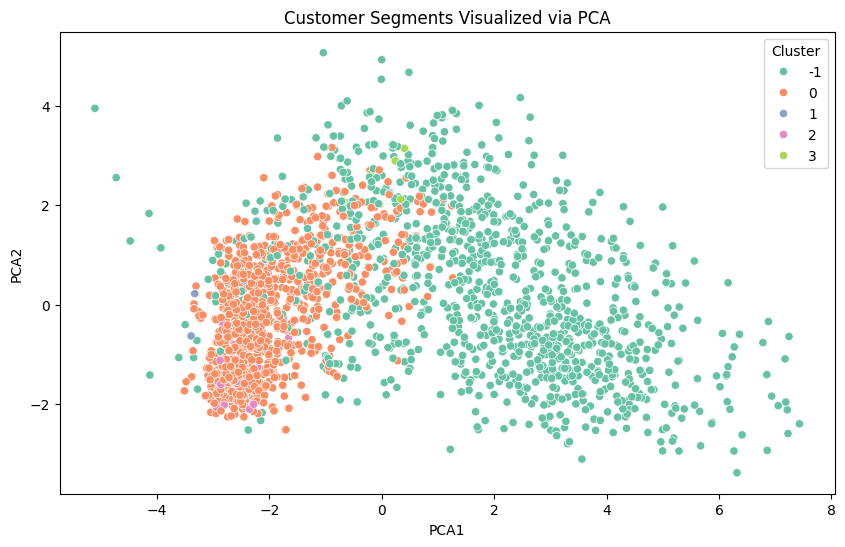

In [14]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled) 

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title('Customer Segments Visualized via PCA')
plt.show()

In [15]:
df['Cluster'].unique()

array([-1,  0,  1,  3,  2], dtype=int64)

In [16]:
df['Cluster'].value_counts()


Cluster
-1    1185
 0    1007
 2      36
 1       7
 3       5
Name: count, dtype: int64

In [17]:
small_clusters = df['Cluster'].value_counts()[df['Cluster'].value_counts() < 50].index.tolist()
print(small_clusters)


[2, 1, 3]


In [18]:
df['Cluster'] = df['Cluster'].apply(lambda x: 'Other' if x in small_clusters else f"Cluster {x}")


In [19]:
df['Cluster'].unique()

array(['Cluster -1', 'Cluster 0', 'Other'], dtype=object)

In [20]:
# Cluster profiling: mean values for each cluster
profile = df.groupby('Cluster').mean(numeric_only=True).T

# Display profile
print("📊 Cluster Profiles (average values across numeric features):")
print(profile)


📊 Cluster Profiles (average values across numeric features):
Cluster                Cluster -1     Cluster 0         Other
Year_Birth            1966.992405   1970.661370   1974.645833
Education                2.445570      2.339623      2.250000
Marital_Status           3.751055      3.696127      3.916667
Income               65812.314768  37147.662860  33703.656250
Kidhome                  0.194937      0.709037      1.041667
Teenhome                 0.509705      0.514399      0.250000
Recency                 49.636287     48.839126     41.770833
MntWines               508.751055     74.244290     66.291667
MntFruits               44.695359      5.714002      4.145833
MntMeatProducts        288.688608     30.793446     17.979167
MntFishProducts         64.194093      7.673287      5.416667
MntSweetProducts        46.315612      5.508441      3.958333
MntGoldProds            68.031224     16.854022     21.250000
NumDealsPurchases        2.405063      2.251241      1.895833
NumWebPur

## Customer Segmentation Summary

After applying **DBSCAN clustering** and **PCA dimensionality reduction**, we uncovered three key customer segments based on behavior, income, spending habits, and campaign responses:

---

### Cluster -1 → High-Value Loyalists

These are the brand's most valuable and loyal customers.

**Key Traits:**
- Older customers (Average birth year: ~1967)
- High income (₹65K+)
- Heavy spenders, especially on wines and meat products
- Prefer catalog purchases and store visits
- Higher campaign response rate
- Represent premium, highly engaged buyers

---

### Cluster 0 → Budget-Conscious Families

A larger segment of practical, deal-seeking customers.

**Key Traits:**
- Slightly younger (Average birth year: ~1970)
- Moderate income
- Likely to have kids at home
- Lower overall spending
- High web visit frequency
- Low campaign engagement
- Likely to be bargain-hunters who browse before purchasing

---

### Other (Small Clusters) → Opportunistic Newcomers

Small in size but interesting in behavior — potential for growth.

**Key Traits:**
- Younger customers (Average birth year: ~1974)
- Low spenders, but high acceptance rate of campaigns
- Possibly new or exploring customers
- Could represent anomalies or early-stage leads
- Worth monitoring for upsell opportunities


#### VISUALISATION

In [21]:
# Set theme and colors
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=df['Cluster'].nunique())  


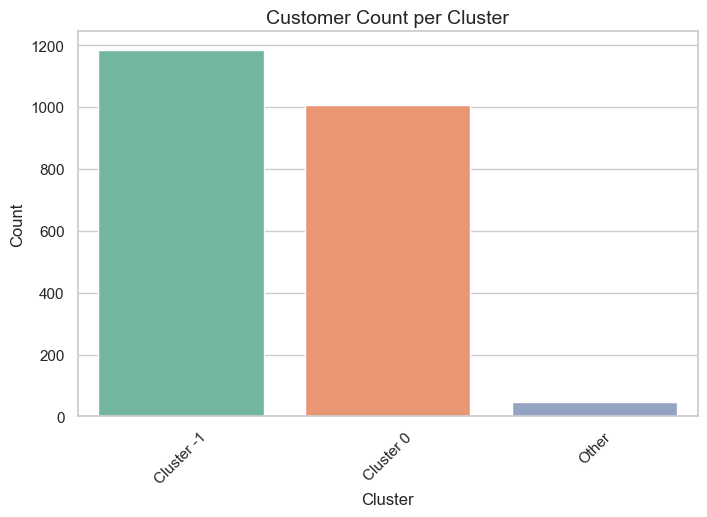

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='Cluster', data=df, palette=palette)
plt.title("Customer Count per Cluster", fontsize=14)
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


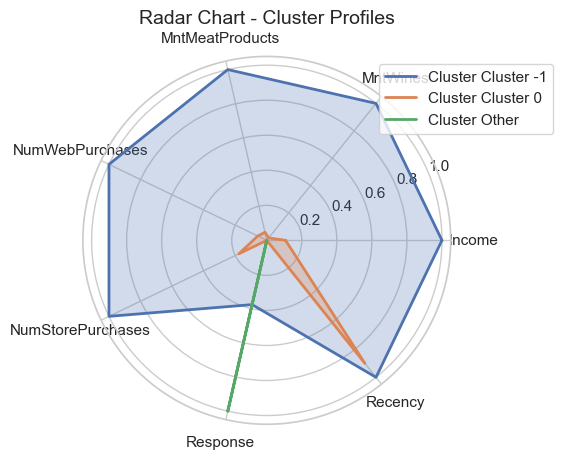

In [23]:

features = ['Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases', 
            'NumStorePurchases', 'Response', 'Recency']

cluster_profiles = df.groupby('Cluster')[features].mean()

# Normalize values (0 to 1) for radar plot
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(cluster_profiles)
labels = cluster_profiles.index.astype(str)

# Radar setup
angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
normalized_data = np.concatenate((normalized_data, normalized_data[:,[0]]), axis=1)
angles += angles[:1]

# Plot
fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
for idx, row in enumerate(normalized_data):
    ax.plot(angles, row, label=f'Cluster {labels[idx]}', linewidth=2)
    ax.fill(angles, row, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(features)
ax.set_title('Radar Chart - Cluster Profiles', size=14)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()


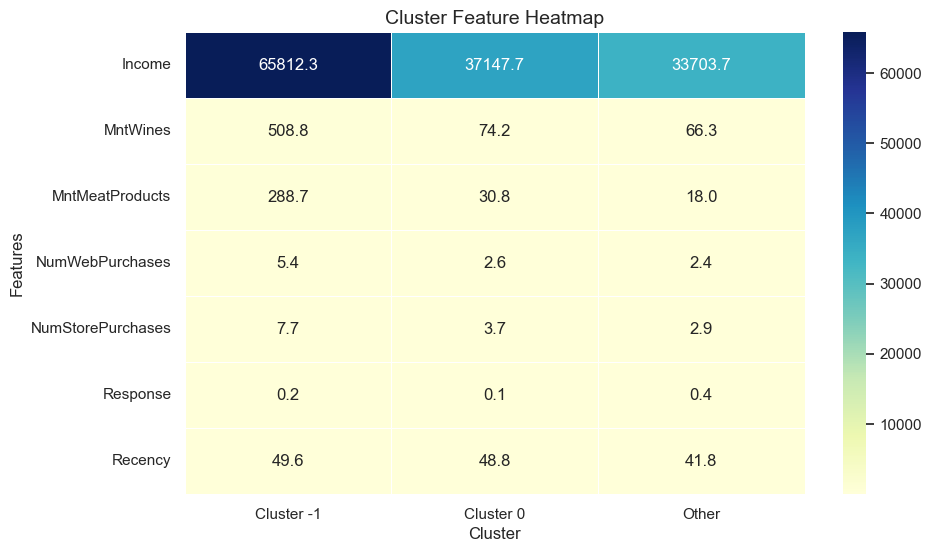

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(cluster_profiles.T, annot=True, cmap="YlGnBu", fmt=".1f", linewidths=0.5)
plt.title("Cluster Feature Heatmap", fontsize=14)
plt.ylabel("Features")
plt.xlabel("Cluster")
plt.show()


In [25]:
def label_cluster(cluster):
    if cluster == 'Cluster -1':
        return 'High-Value Loyalists'
    elif cluster == 'Cluster 0':
        return 'Budget-Conscious Families'
    else:
        return 'Opportunistic Newcomers'

df['Cluster_Description'] = df['Cluster'].apply(label_cluster)


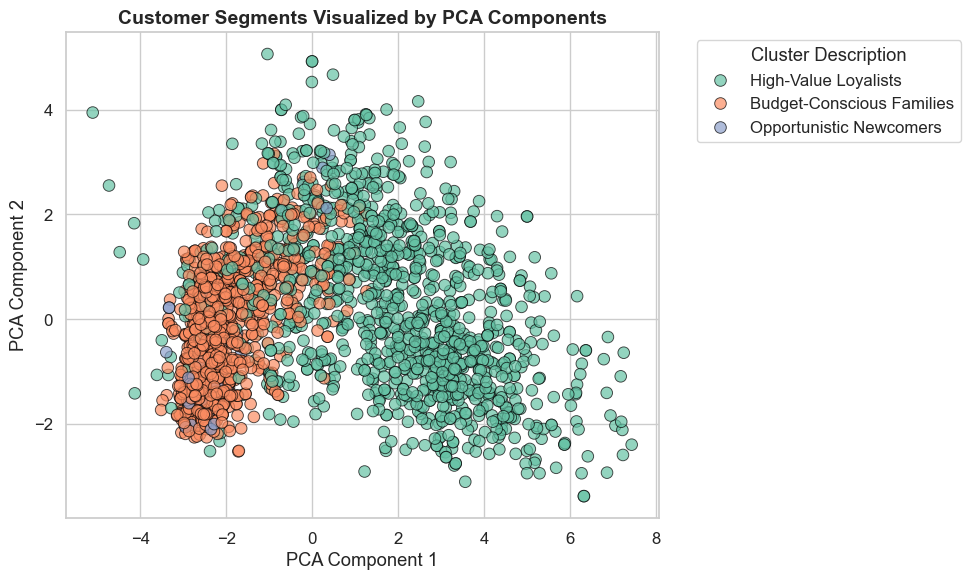

In [26]:
# Set aesthetic style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# Create the plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1',
    y='PCA2',
    hue='Cluster_Description',
    data=df,
    palette='Set2',
    s=70,
    edgecolor='black',
    alpha=0.7
)

# Final touch-ups
plt.title("Customer Segments Visualized by PCA Components", fontsize=14, fontweight='bold')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster Description', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##  PART 2 : CUSTOMER CLASSIFICATION ARC

#### Dataset 

In [27]:
df_model = df[df['Cluster'] != 'Other'].copy()


In [28]:
label_map = {
    'Cluster -1': 1,  # High-value loyal customers
    'Cluster 0': 0    # Budget-conscious low-engagement customers
}

df_model['Target'] = df_model['Cluster'].map(label_map)

In [29]:
selected_features = [
    'Income', 'MntWines', 'MntMeatProducts',
    'NumWebPurchases', 'NumCatalogPurchases',
    'NumStorePurchases', 'Response'
]

X = df_model[selected_features]
y = df_model['Target']  

#### DATA SPLIT AND SCALING

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### MODEL BENCHMARKING 

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train the model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[186  16]
 [ 37 200]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.88       202
           1       0.93      0.84      0.88       237

    accuracy                           0.88       439
   macro avg       0.88      0.88      0.88       439
weighted avg       0.88      0.88      0.88       439



In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


Confusion Matrix:
[[184  18]
 [ 30 207]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       202
           1       0.92      0.87      0.90       237

    accuracy                           0.89       439
   macro avg       0.89      0.89      0.89       439
weighted avg       0.89      0.89      0.89       439



In [33]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Fit the model
xgb.fit(X_train, y_train)

# Predict on test data
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=['Cluster -1', 'Cluster 0']))


Confusion Matrix:
[[184  18]
 [ 35 202]]

Classification Report:
              precision    recall  f1-score   support

  Cluster -1       0.84      0.91      0.87       202
   Cluster 0       0.92      0.85      0.88       237

    accuracy                           0.88       439
   macro avg       0.88      0.88      0.88       439
weighted avg       0.88      0.88      0.88       439



### Model Comparison

We tested multiple models to evaluate performance and choose the best one:

- Logistic Regression: 86%
- Random Forest: 88%
- XGBoost: 88%
- **LightGBM: 89% ✅**


In [34]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the model
lgb = LGBMClassifier(random_state=42)

# Fit the model
lgb.fit(X_train, y_train)

# Predict on test data
y_pred_lgb = lgb.predict(X_test)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgb))


[LightGBM] [Info] Number of positive: 948, number of negative: 805
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 806
[LightGBM] [Info] Number of data points in the train set: 1753, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.540787 -> initscore=0.163512
[LightGBM] [Info] Start training from score 0.163512
Confusion Matrix:
 [[186  16]
 [ 34 203]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       202
           1       0.93      0.86      0.89       237

    accuracy                           0.89       439
   macro avg       0.89      0.89      0.89       439
weighted avg       0.89      0.89      0.89       439



#### ROC-AUC Curve & PR Curve

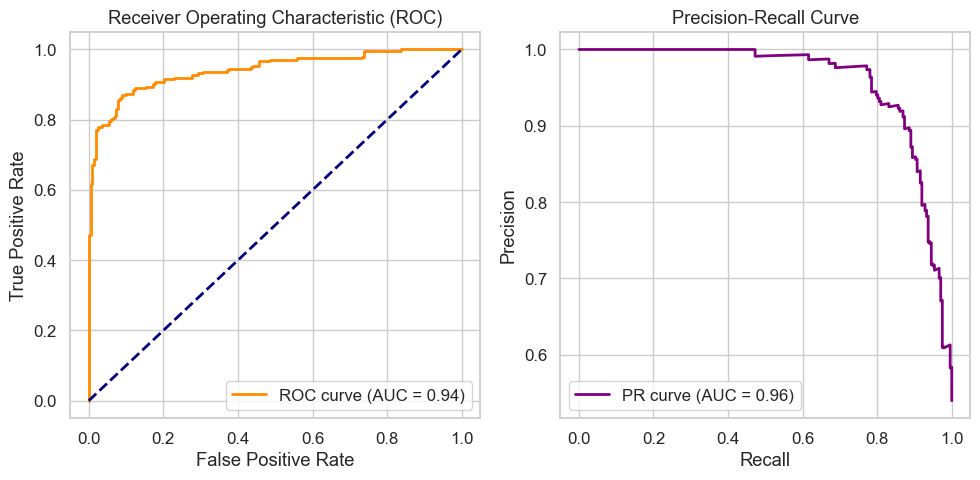

In [35]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
y_proba = lgb.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# === ROC Curve ===
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(10, 5))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# === Precision-Recall Curve ===
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='purple', lw=2, label='PR curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


#### MANUAL TESTING 

In [36]:

# One sample to test prediction
sample_input = pd.DataFrame([{
    'Income': 65000,
    'MntWines': 300,
    'MntMeatProducts': 200,
    'NumWebPurchases': 6,
    'NumCatalogPurchases': 2,
    'NumStorePurchases': 5,
    'Response': 1  # assume this person responded to campaigns
}])

# Scale the input just like training
sample_scaled = scaler.transform(sample_input)

# Make prediction
prediction = lgb.predict(sample_scaled)

print("Predicted Class:", prediction[0])


Predicted Class: 1


#### SAVING THE LGBM MODEL 

In [37]:
import joblib

# Save the model
joblib.dump(lgb, 'lightgbm_customer_segmentation_model.pkl')

print("Model saved successfully as 'lightgbm_customer_segmentation_model.pkl'")


Model saved successfully as 'lightgbm_customer_segmentation_model.pkl'


 # THANKS !!! 